## 정적 크롤링 모듈

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

- 요청모듈로 가져온 HTML 코드를 파이썬이 쓸 수 있는 형태로 변환해 주는 역할

In [2]:
url = 'https://www.naver.com'

page = urlopen(url)

soup = BeautifulSoup(page, 'lxml')

<!DOCTYPE html>
<html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"/> <meta content="index,nofollow" name="robots"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:
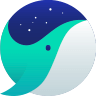
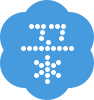

In [3]:
print(soup)

### 파서

- 내가 원하는 데이터를 특정 패턴이나 순서로 추출하여 정보를 가공해 주는 프로그램 ('lxml'도 파서 중 하나)
    - lxml
        - c언어로 구현되어 속도가 가장 빠르다
    - html5lib
        - 웹브라우저 형태로 HTML을 분석
        - 속도가 가장 느림
        - 가장 안정적
    - html.parser
        - lxml과 html5lib의 중간 속도

In [4]:
import time

In [6]:
S = time.time()
BeautifulSoup(page, 'lxml')

lxml_time = time.time() - S
###############################################################
S = time.time()
BeautifulSoup(page, 'html.parser')

html_parser_time = time.time() - S
####################################################
S = time.time()
BeautifulSoup(page, 'html5lib')

html5lib_time = time.time() - S

print(f'lxml 시간 측정 : {lxml_time}초')
print(f'html.parser 시간 측정 : {html_parser_time} 초')
print(f'html5lib 시간 측정 : {html5lib_time} 초')


lxml 시간 측정 : 0.0009610652923583984초
html.parser 시간 측정 : 0.0 초
html5lib 시간 측정 : 0.0010259151458740234 초


In [7]:
%%timeit

BeautifulSoup(page, 'html.parser')

41.5 µs ± 285 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [8]:
%%timeit

BeautifulSoup(page, 'html5lib')

118 µs ± 499 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [9]:
%%timeit

BeautifulSoup(page, 'lxml')

58.7 µs ± 632 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
type(soup)

bs4.BeautifulSoup

<!DOCTYPE html>
<html data-dark="false" lang="ko">
 <head>
  <meta charset="utf-8"/>
  <title>
   NAVER
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=1190" name="viewport"/>
  <meta content="NAVER" name="apple-mobile-web-app-title"/>
  <meta content="index,nofollow" name="robots"/>
  <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"/>
  <meta content="네이버" property="og:title"/>
  <meta content="https://www.naver.com/" property="og:url"/>
  <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/>
  <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"/>
  <meta content="summary" name="twitter:card"/>
  <meta content="" name="twitter:title"/>
  <meta content="https://www.naver.com/" name="twitter:url"/>
  <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/>
  <meta content="네이버 메인에서
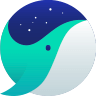
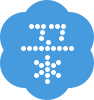

In [11]:
# html을 예쁘게 출력
print(soup.prettify())

### 속성 데이터

In [15]:
html = """<html> <head><title class="t" id="ti">test site</title></head> <body> <p>test</p> <p>test1</p> <p>test2</p> </body></html>"""

soup = BeautifulSoup(html, 'lxml')

tag_title = soup.title
print(tag_title)
print(tag_title.attrs) # 태그의 속성 가져오기
print(tag_title['class'])
print(tag_title['id'])

<title class="t" id="ti">test site</title>
{'class': ['t'], 'id': 'ti'}
['t']
ti


In [17]:
tag_title.get('class1', 'default_value')

'default_value'

In [18]:
type(tag_title)
# tag 타입은 딕셔너리처럼 접근할 수 있고 딕셔너리 문법을 그대고 적용할 수 있음

bs4.element.Tag

### 태그 접근

In [20]:
url = 'http://www.naver.com'

page = urlopen(url)

soup = BeautifulSoup(page, 'lxml')

tag_title = soup.title
print(tag_title)

<title>NAVER</title>


In [23]:
print(tag_title.text)
print(tag_title.string)
print(tag_title.name)

NAVER
NAVER
title


In [25]:
# text와 string 차이

html = """<html> <head><title>test site</title></head> <body> <p><span>test1</span><span>test2</span></p> </body></html>"""

soup = BeautifulSoup(html, 'lxml')

tag_p = soup.p

data_text = tag_p.text
data_string = tag_p.string

print('text : ', data_text, type(data_text))
print('string : ', data_string, type(data_string))

text :  test1test2 <class 'str'>
string :  None <class 'NoneType'>


- text
    - 하위 태그들의 값도 모두 출력
- string
    - 정확히 해당 태그에 대한 값만 출력

In [27]:
tag_p.span.string

'test1'

## 원하는 요소에 접근하기

- find vs select 방식

- find는 거의 안 사용한다

### find_all()
- 원하는 태그들을 리스트 형태로 가져오기

In [32]:
html = """<html> <head><title>test site</title></head> <body> <p>test1</p><p id="d" class='d'>test2</p><p>test3</p></p> </body></html>"""

soup = BeautifulSoup(html, 'lxml')

In [33]:
soup.find_all('title')

[<title>test site</title>]

In [34]:
soup.find_all('p')

[<p>test1</p>, <p class="d" id="d">test2</p>, <p>test3</p>]

In [35]:
# 원하는 태그, 원하는 id 값으로 태그 가져오기
print(soup.find_all('p', id = 'd'))
print(soup.find_all('p', id = 'c'))

[<p class="d" id="d">test2</p>]
[]


In [38]:
print(soup.find_all('p', class_='d'))

[<p class="d" id="d">test2</p>]


class_?
이미 파이썬에 class가 있기 때문에 그것과 혼용되지 않기 위해
구별하기 위해 뒤에 언더바를 넣었다.

- find_all() 연속으로 사용하기

In [40]:
tag_body = soup.find_all('body')
print(tag_body)
tag_p = tag_body[0].find_all('p')
print(tag_p)

[<body> <p>test1</p><p class="d" id="d">test2</p><p>test3</p> </body>]
[<p>test1</p>, <p class="d" id="d">test2</p>, <p>test3</p>]


### find()

- 하나의 요소만 가져옴
- 찾고자 하는 요소가 하나만 있을 때 사용
    - 예) id값으로 접근
    

In [43]:
html = """<html> <head><title>test site</title></head> <body> <p id="i" class="a">test1</p><p class="d">test2</p><p class="d">test3</p></p> <a>a tag</a> <b>b tag</b></body></html>"""

soup = BeautifulSoup(html, 'lxml')

print(soup.find('p', class_ = 'd'))
print(soup.find(id = 'i'))

<p class="d">test2</p>
<p class="a" id="i">test1</p>


In [44]:
soup.find('body').find('p', class_ = 'd')

<p class="d">test2</p>

### select()

- find_all()과 마찬가지로 매칭되는 모든 결과를 리스트로 반환
- 클래스는 마침표(.), 아이디는 샵(#), 자식태그는 띄어쓰기로 표현
- select_one()으로 하나의 결과만을 반환하는 것도 가능

In [45]:
print(soup.select('p'))

[<p class="a" id="i">test1</p>, <p class="d">test2</p>, <p class="d">test3</p>]


In [46]:
print(soup.select('p.d'))

[<p class="d">test2</p>, <p class="d">test3</p>]


In [47]:
print(soup.select('.d'))

[<p class="d">test2</p>, <p class="d">test3</p>]


In [48]:
print(soup.select('#i'))

[<p class="a" id="i">test1</p>]


In [49]:
print(soup.select('p#i'))

[<p class="a" id="i">test1</p>]


In [50]:
print(soup.select('body p')) # body 태그 안에 있는 p 태그

[<p class="a" id="i">test1</p>, <p class="d">test2</p>, <p class="d">test3</p>]


In [52]:
print(soup.select('body .d')) # body 태그 안에 있는 d 클래스

[<p class="d">test2</p>, <p class="d">test3</p>]


In [54]:
print(soup.select('.d'))

[<p class="d">test2</p>, <p class="d">test3</p>]


In [55]:
print(soup.select('body p.d'))

[<p class="d">test2</p>, <p class="d">test3</p>]


In [56]:
print(soup.select('body p#i'))

[<p class="a" id="i">test1</p>]


In [57]:
print(soup.select('body #i'))

[<p class="a" id="i">test1</p>]


### 네이버 영화 랭킹 크롤링

In [2]:
url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver'

page = urlopen(url)
soup = BeautifulSoup(page, 'lxml')

In [3]:
print(soup)

<!DOCTYPE html>
<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image"/>
<meta content="네이버영화 " property="me2:post_tag"/>
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.naver" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>
<meta content="https://m

In [10]:
title = soup.select('div.tit3 a')

In [11]:
len(title)

50

In [12]:
title[0].text

'모가디슈'

In [13]:
for i in title:
    print(i.text)

모가디슈
방법: 재차의
정글 크루즈
더 수어사이드 스쿼드
블랙 위도우
랑종
보스 베이비 2
분노의 질주: 더 얼티메이트
이스케이프 룸 2: 노 웨이 아웃
아이스 로드
CCTV
싱크홀
우리, 둘
이도공간
피닉스
발신제한
그린 나이트
크루엘라
인질
나만 보이니
킬러의 보디가드 2: 킬러의 와이프
잘리카투
프리 가이
꽃다발 같은 사랑을 했다
오필리아
더 그레이트 샤크
졸트
올드
갈매기
낙인
블랙핑크 더 무비
귀문
극장판 도라에몽: 진구의 신공룡
배틀 크랙
은혼 더 파이널
콰이어트 플레이스 2
인사이드 르윈
베스트 오퍼
그린 북
바람의 검심 최종장: 더 비기닝
베놈 2: 렛 데어 비 카니지
바람의 검심 최종장: 더 파이널
귀신
화양연화
극장판 귀멸의 칼날: 무한열차편
암살자들
수어사이드 스쿼드
춘향뎐
루카
극장판 짱구는 못말려: 격돌! 낙서왕국과 얼추 네 명의 용사들


In [16]:
soup.find_all('div', class_ = 'tit3')

[<div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=192150" title="모가디슈">모가디슈</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=200785" title="방법: 재차의">방법: 재차의</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=179406" title="정글 크루즈">정글 크루즈</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=167569" title="더 수어사이드 스쿼드">더 수어사이드 스쿼드</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=184318" title="블랙 위도우">블랙 위도우</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=204496" title="랑종">랑종</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=191597" title="보스 베이비 2">보스 베이비 2</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=189150" title="분노의 질주: 더 얼티메이트">분노의 질주: 더 얼티메이트</a>
 </div>,
 <div class="tit3">
 <a href="/movie/bi/mi/basic.naver?code=191548" title="이스케이프 룸 2: 노 웨이 아웃">이스케이프 룸 2: 노 웨이 아웃</a>
 </div>,
 <div class="tit3">
 <a hre

In [17]:
len(soup.find_all('div', class_ = 'tit3'))

50

In [19]:
for i in soup.find_all('div', class_ = 'tit3'):
    print(i.find('a').text)

모가디슈
방법: 재차의
정글 크루즈
더 수어사이드 스쿼드
블랙 위도우
랑종
보스 베이비 2
분노의 질주: 더 얼티메이트
이스케이프 룸 2: 노 웨이 아웃
아이스 로드
CCTV
싱크홀
우리, 둘
이도공간
피닉스
발신제한
그린 나이트
크루엘라
인질
나만 보이니
킬러의 보디가드 2: 킬러의 와이프
잘리카투
프리 가이
꽃다발 같은 사랑을 했다
오필리아
더 그레이트 샤크
졸트
올드
갈매기
낙인
블랙핑크 더 무비
귀문
극장판 도라에몽: 진구의 신공룡
배틀 크랙
은혼 더 파이널
콰이어트 플레이스 2
인사이드 르윈
베스트 오퍼
그린 북
바람의 검심 최종장: 더 비기닝
베놈 2: 렛 데어 비 카니지
바람의 검심 최종장: 더 파이널
귀신
화양연화
극장판 귀멸의 칼날: 무한열차편
암살자들
수어사이드 스쿼드
춘향뎐
루카
극장판 짱구는 못말려: 격돌! 낙서왕국과 얼추 네 명의 용사들
